# Plotting some figures 

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib.pyplot as plt

sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, '../auxnumerics/')
sys.path.insert(0, '../')

import icenumerics as ice
import auxiliary as aux

from parameters import params

%reload_ext autoreload
%autoreload 2

ureg = ice.ureg
idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
DATA_PATH = '../../data/test11'

## Sanity check

Just checking the the field profile is correct

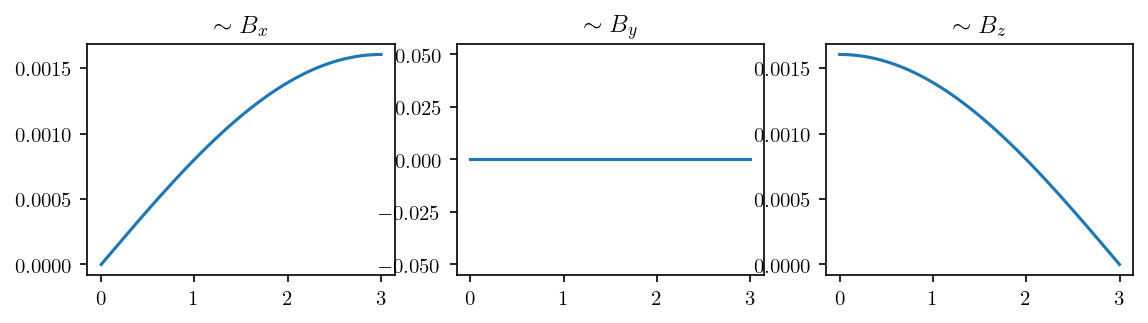

In [4]:
ctrj_raw = pd.read_csv(os.path.join(DATA_PATH,'10','3','20mT/trj/trj10.csv'), index_col=[0,1])

fig, axes = plt.subplots(1,3,figsize=(9,2),dpi=150)

ax = axes[0]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"mux"]))
ax.set_title("$\\sim B_x$")

ax = axes[1]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muy"]))
ax.set_title("$\\sim B_y$")

ax = axes[2]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muz"]))
ax.set_title("$\\sim B_z$")

plt.show()


## Counts vs angle (time)

In [5]:
raw_data = pd.read_csv(os.path.join(DATA_PATH,'10','average_counts.csv'),index_col=['field','time'])
omega = np.pi/2/raw_data.total_time.to_numpy()
raw_data['omega'] = np.around(omega,4)
raw_data['theta'] = raw_data.index.get_level_values('time') * raw_data.omega
raw_data

I     II    III     IV      V     VI  total_time   omega  \
field time                                                                  
20    0.00   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
      0.05   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
      0.10   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
      0.15   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
      0.20   0.000  0.000  1.000  0.000  0.000  0.000           1  1.5708   
...            ...    ...    ...    ...    ...    ...         ...     ...   
10    99.75  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   
      99.80  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   
      99.85  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   
      99.90  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   
      99.95  0.293  0.178  0.015  0.016  0.232  0.266         100  0.0157   

                theta  
field time             
20    0.00   0.000000  
      0.05   0.078540  
      0.10   0.157080  
      0.15   0.235620  
      0.20   0.314160  
...               ...  
10    99.75  1.566075  
      99.80  1.566860  
      99.85  1.567645  
      99.90  1.568430  
      99.95  1.569215  

[281400 rows x 9 columns]

In [38]:
ws = raw_data.omega.unique()
ws = np.array([0.7854, 0.5236, 0.3927, 0.3142, 0.2618, 0.2244, 0.1963,
       0.0196, 0.0175, 0.0157])

In [7]:
def plot_simple_colloids(ax, title, centers, dirs, sep=1/9, scale=1/2):
    for c,d in zip(centers,dirs):
        atom = (c+sep*d)*scale
        trap = (c-sep*d)*scale
        ax.scatter(*atom,c='#c02a2e',s=50)
        ax.scatter(*trap,c='#b1bfb3',s=50)
        ax.set_title(title)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_xlim(xlim[0] - 0.05, xlim[1] + 0.05)
    ax.set_ylim(ylim[0] - 0.05, ylim[1] + 0.05)

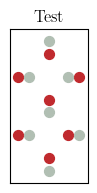

In [8]:
fig, ax = plt.subplots(figsize=(1,2))
centers = np.array([[0,0],[1,0],[1/2,1/2],[1/2,-1/2],[1/2,3/2],[0,1],[1,1]])
af4 = np.array([[1,0],[-1,0],[0,-1],[0,1],[0,1],[-1,0],[1,0]])
af2 = np.array([[-1,0],[-1,0],[0,-1],[0,1],[0,1],[1,0],[1,0]])
zero = np.array([[-1,0],[-1,0],[0,1],[0,1],[0,-1],[-1,0],[1,0]])

plot_simple_colloids(ax,'Test',centers,zero)
plt.show()

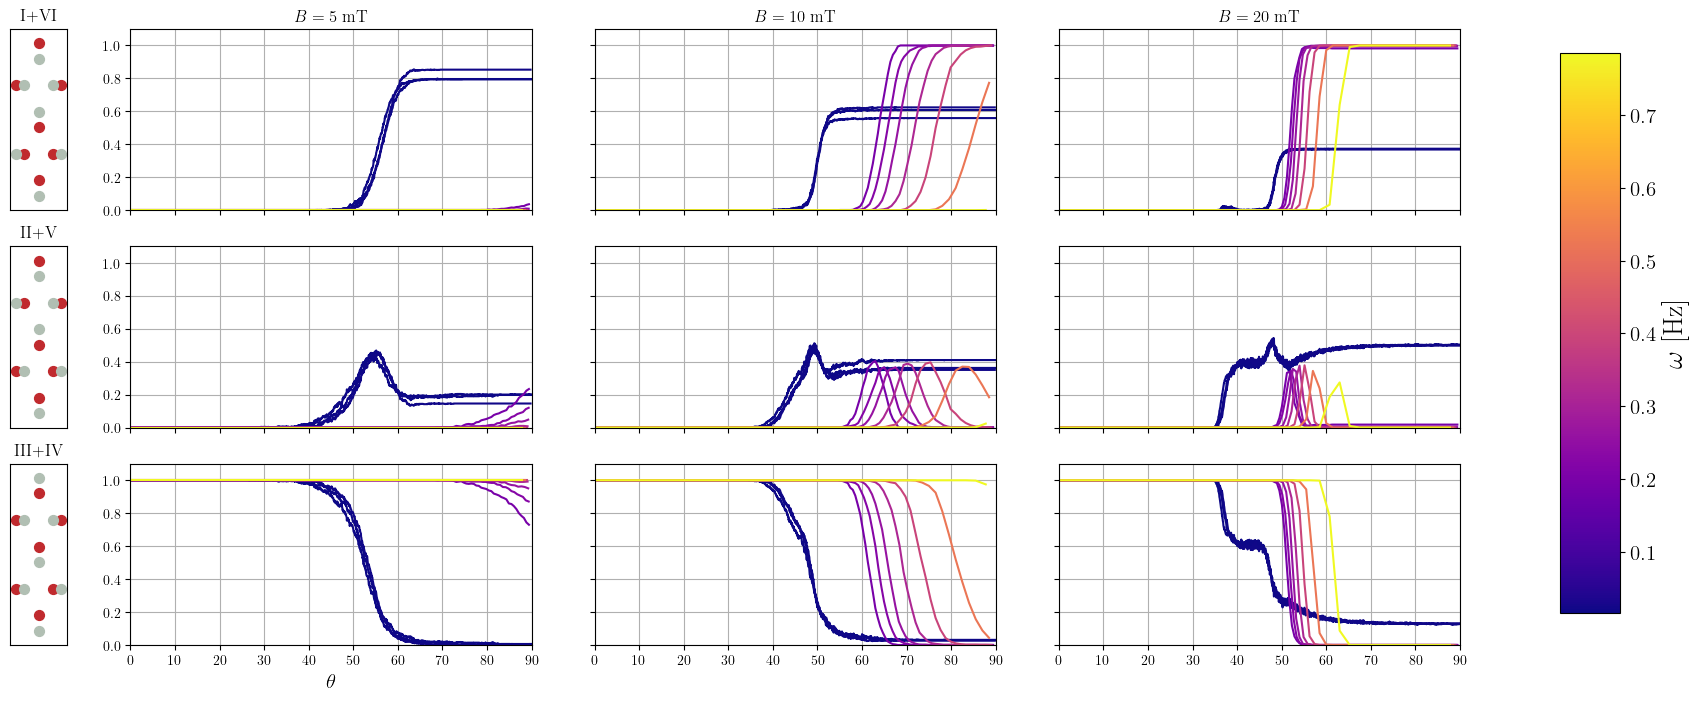

In [90]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 8),
                         gridspec_kw={
                           'width_ratios': [1, 7, 7 ,7],
                           'height_ratios': [1, 1, 1],
                           'wspace': 0.2,
                           'hspace': 0.2})

norm = plt.Normalize(min(ws),max(ws))
cmap = plt.get_cmap('plasma')

field_values = [5,10,20]

for j,B in enumerate(field_values):
    for i,(w,cdf_w) in enumerate(raw_data.groupby('omega')):
        if w not in ws:
            continue
        else:
            cdf_wB = cdf_w.xs(B,level='field')
            axes[0][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.I + cdf_wB.VI, color = cmap(norm(w)))
            axes[0][j+1].set_title(f'$B = {B}$ mT')
            
            axes[1][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.II + cdf_wB.V, color = cmap(norm(w)))
            
            axes[2][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.III + cdf_wB.IV, color = cmap(norm(w)))

plot_simple_colloids(axes[0][0],'I+VI',centers,af4)
plot_simple_colloids(axes[1][0],'II+V',centers,af2)
plot_simple_colloids(axes[2][0],'III+IV',centers,zero)

# set the grids
for i in range(3):
    for j in range(1,4):
        axes[i][j].grid()
        axes[i][j].set_ylim(0,1.1)
        axes[i][j].set_xlim(0,90)
        
        if i<2:
            axes[i][j].set_xticklabels([])
        if j>1: 
            axes[i][j].set_yticklabels([])

axes[2][1].set_xlabel('$\\theta$',fontsize=15)

fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='$\\omega$ [Hz]',fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.show()


## Vertex counting

In [85]:
omega_time = {w:df_w.index.get_level_values('time').max() for w,df_w in raw_data.groupby('omega')}
omegas = list(omega_time.keys())

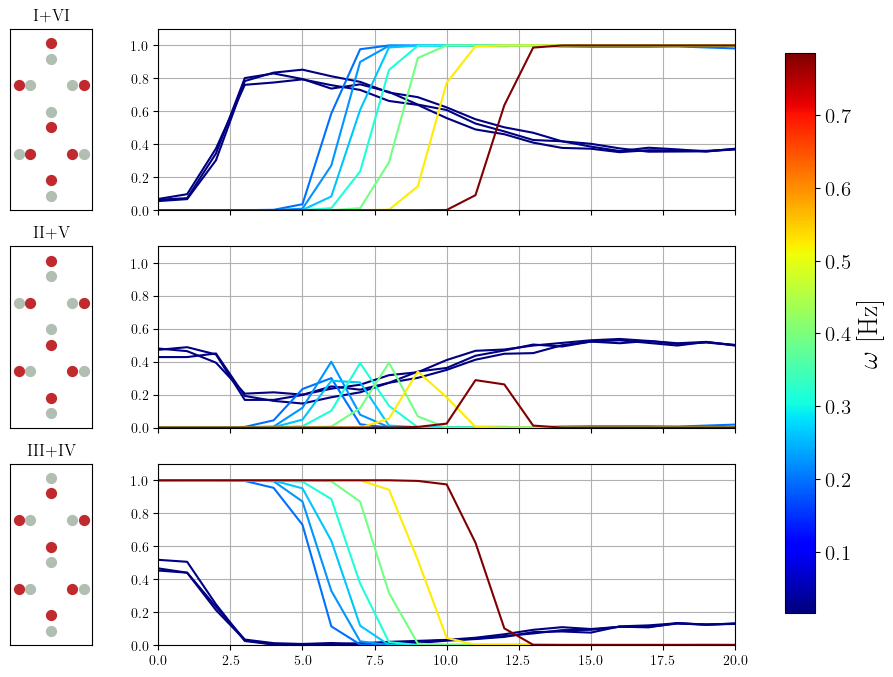

In [106]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8),
                         gridspec_kw={
                           'width_ratios': [1, 7,],
                           'height_ratios': [1, 1, 1],
                           'wspace': 0.2,
                           'hspace': 0.2})

norm = plt.Normalize(min(omegas),max(ws))
cmap = plt.get_cmap('jet')

plot_simple_colloids(axes[0][0],'I+VI',centers,af4)
plot_simple_colloids(axes[1][0],'II+V',centers,af2)
plot_simple_colloids(axes[2][0],'III+IV',centers,zero)

for w, cdf_omega in raw_data.groupby('omega'):
    if w not in ws:
            continue
    cdf_last = cdf_omega.xs(omega_time[w],level='time').sort_index()
    axes[0][1].plot(cdf_last.index.get_level_values('field'), cdf_last.I + cdf_last.VI, color=cmap(norm(w)) )
    axes[1][1].plot(cdf_last.index.get_level_values('field'), cdf_last.II + cdf_last.V, color=cmap(norm(w)) )
    axes[2][1].plot(cdf_last.index.get_level_values('field'), cdf_last.III + cdf_last.IV, color=cmap(norm(w)) )

for i in range(3):
    axes[i][1].set_xlim(0,20)
    axes[i][1].set_ylim(0,1.1)
    axes[i][1].grid()
    
    if i<2:
        axes[i][1].set_xticklabels([])


    
fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='$\\omega$ [Hz]',fontsize=20)
cbar.ax.tick_params(labelsize=15)
   
plt.show()

# Area vs omega

In [265]:
def get_intersection(fields,x):
    last = x[-1]
    
    for i,xi in enumerate(x[:-1]):
        diff = np.abs(xi-last) 
        if diff<0.05:
            return i

In [293]:
def areabcurves(x,y):
    idx = get_intersection(x, y)
    
    dx = x[1] - x[0]
    y2 = test[idx:]
    y1 = [y2[0] for i in range(len(y2))]
    x = fields[idx:]

    return np.trapz(y2,x,dx=dx) - np.trapz(y1,x,dx=x)

In [325]:
from scipy.interpolate import CubicSpline
def smooth_mesh(x,y):
    cs = CubicSpline(x,y)
    newmesh = np.arange(0,21,0.1)
    return newmesh, cs(newmesh)

def smooth_areas(x,y):
    newx, newy = smooth_mesh(x,y)
    idx = get_intersection(newx,newy)

    base = newx[-1]-newx[idx]
    return np.trapz(newy[idx:],newx[idx:], dx=newx[1]-newx[0]) - base*newy[idx]


In [295]:
IpVI = dict() 
IIpV = dict()
IIIpIV = dict() 

for w, cdf_omega in raw_data.groupby('omega'):
    cdf_last = cdf_omega.xs(omega_time[w],level='time').sort_index()
    
    field = cdf_last.index.get_level_values('field').to_list()
    IpVI[w] = (cdf_last.I + cdf_last.VI).to_list()
    IIpV[w] = (cdf_last.I + cdf_last.VI).to_list()
    IIIpIV[w] = (cdf_last.I + cdf_last.VI).to_list()
 


Here I want from the data get an interpolationof the function to get a more points, bc sometimes there is not a point in the original data that intersects the line.

In [326]:
omegas = list(IpVI.keys())
fields = raw_data.index.get_level_values('field').unique().to_list()
fields = np.sort(fields)
test = IpVI[omegas[-1]]

areas = [smooth_areas(fields,IpVI[w]) for w in omegas[:-1]]

#idx = get_intersection(fields, test)
#idx

# Need to adjust tol in case it encounters None when looking for intersection

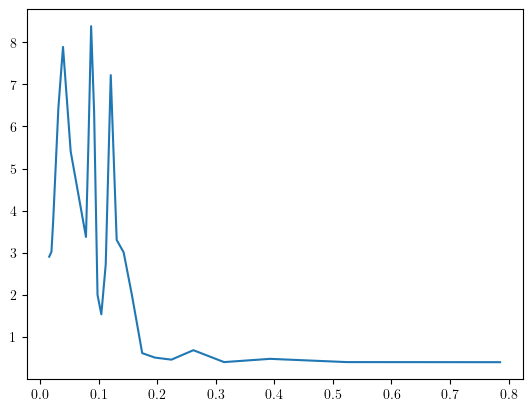

In [329]:
plt.plot(omegas[:-1],areas)

# Only one stuff

In [11]:
all_times = raw_data['total_time'].unique()

In [12]:
to_look = 3
local_counts = counts[counts.total_time == to_look].xs(17,level='field').drop('total_time',axis=1)
time = local_counts.index.to_list()

local_counts['1p6'] = local_counts['I'] + local_counts['VI']
local_counts['1m6'] = (local_counts['I'] - local_counts['VI'])/(local_counts['1p6'] + 0.00001)

local_counts['2p5'] = local_counts['II'] + local_counts['V']
local_counts['2m5'] = (local_counts['II'] - local_counts['V'])/(local_counts['2p5'] + 0.00001)

local_counts['3p4'] = local_counts['III'] + local_counts['IV']
local_counts['3m4'] = (local_counts['III'] - local_counts['IV'])/(local_counts['3p4'] + 0.00001)

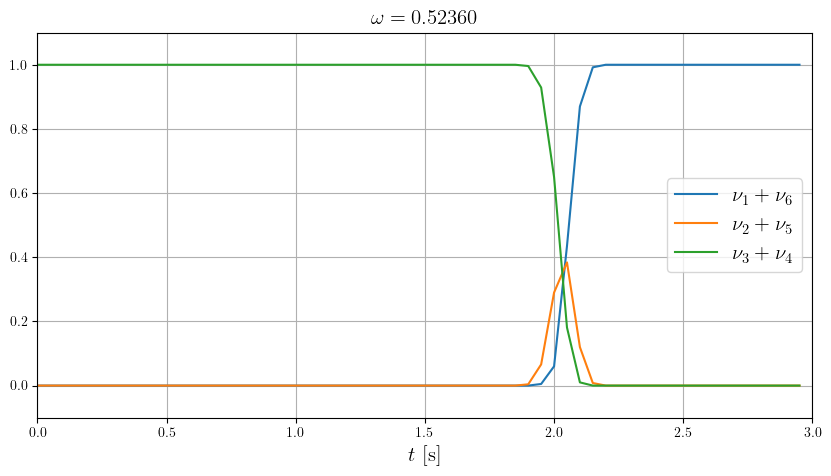

In [13]:
colors = ['#2200cf','#606cff', '#00a92a', '#5d6061', '#ff514c','#ca0600'  ]

fig, ax = plt.subplots(figsize=(10,5))
for i, vtp in enumerate(types2[:3]):
    ax.plot(time, local_counts[vtp] , label=types_fancy[i])
ax.set_ylim(-0.1,1.1)
ax.set_xlim(0,to_look)
ax.set_xlabel('$t$ [s]',fontsize=15)
ax.set_title(f'$\\omega = {np.pi/2/to_look:1.5f}$',fontsize=15)
ax.legend(fontsize=15)
ax.grid()